In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import copy

In [2]:
# Some basic functions 
def p_elec(q1,q2,r):
    return q1*q2/r

def E_total(atoms_array):
    E_total = 0
    for i in range(len(atoms_array)-1):
        for j in range(i+1,len(atoms_array)-1):
            E_total += p_elec(atoms_array[i,3], atoms_array[j,3], np.linalg.norm(atoms_array[i,1:3] - atoms_array[j,1:3]))
    return E_total

def plot_MC_step(atoms_array):
    clr_list = []
    for i in range(len(atoms_array)):
        if atoms_array[i,3] == 1:
            clr_list.append('blue')
        elif atoms_array[i,3] == -1:
            clr_list.append('red')
        else:
            clr_list.append('grey')

    plt.rcParams["figure.figsize"] = (4,4)
    plt.scatter(atoms_array[:,1], atoms_array[:,2], color = clr_list)
    plt.show()
    return None

In [3]:
# Main MC functions
def accept(E_before, E_after):
    kBT = 1 # check your LJ units
    if E_after <= E_before:
        return True
    else:
        p = np.exp((E_before - E_after)/kBT)
        if p > random.uniform(0, 1):
            return True
        else:
            return False

def MC_step(atoms_array):
    ''' Here the format of the array should [type, x, y, q] 
        This function not calculate the minimum energy of a given configuration 
        type 1 = positive charge
        type 2 = negative charge '''
    E_before =  E_total(atoms_array)
    previous_array = copy.deepcopy(atoms_array)
    ndx = random.randrange(len(atoms_array))
    # if it is positive charged bead, change it from +1 to 0 or 0 to +1
    if atoms_array[ndx, 0] == 1:
        if atoms_array[ndx, 3] == 0:
            atoms_array[ndx, 3] = 1
        else:
            atoms_array[ndx, 3] = 0
    # same with negative charged bead\n",
    elif atoms_array[ndx, 0] == 2:
        if atoms_array[ndx, 3] == 0:
            atoms_array[ndx, 3] = -1
        else:
            atoms_array[ndx, 3] = 0

    E_after = E_total(atoms_array)
    if accept(E_before, E_after):
        return atoms_array, E_after
    else:
        return previous_array, E_before

def MC_run(atoms_array, steps, Verbose=True):
    E_list = []
    E_lowest = 100
    print('start MC simulation')
    print('Total steps : %i' %steps)
    print('---------------------')
    for i in range(steps):
        atoms_array, E = MC_step(atoms_array)
        if E < E_lowest:
            E_lowest = E
            array_lowest_E = copy.deepcopy(atoms_array)
        E_list.append(E)
        if Verbose and i%(steps/10) == 0:
            print("Step %i" %i)
            plot_MC_step(atoms_array)
            print('The energy is %f' %E)
            print('---------------------------------')
    print('The last config')
    plot_MC_step(atoms_array)
    print('The energy is %f' %E)
    print('Finish run!')
    return E_list, E_lowest, array_lowest_E

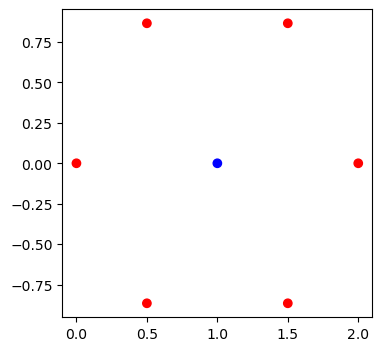

In [4]:
''' Test if the energy would be different if the positive arranged in different patterns'''
# define a base array
# o negative charge; P positive charge; N: neutral; charge = +- 1e; distance = 1 
#        o   o  
#      o   P   o  
#        o   o  

atoms_array_base = np.zeros((7,4)) # 19 atoms, x, y, q
for i in range(2):
    atoms_array_base[i] = [2, 0.5 + i, np.sqrt(3)/2, -1]

for i in range(2, 5):
    atoms_array_base[i] = [2, i-2, 0, -1]

for i in range(5,7):
    atoms_array_base[i] = [2, 0.5 + i - 5, -np.sqrt(3)/2, -1]

atoms_array_base[3,3] = 1
atoms_array_base[3,0] = 1

plot_MC_step(atoms_array_base)

start MC simulation
Total steps : 100000
---------------------
The last config


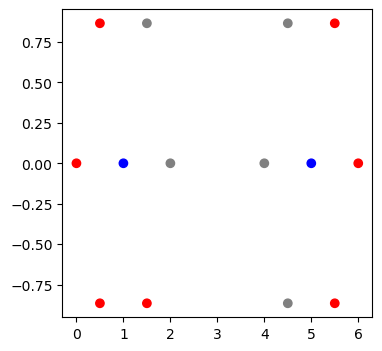

The energy is 0.114795
Finish run!


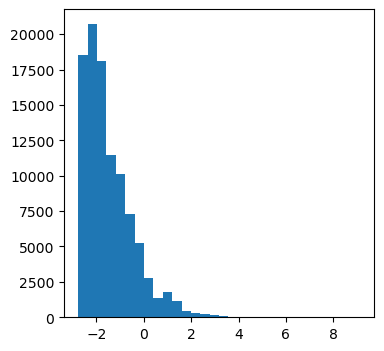

The lowest energy is -2.763479


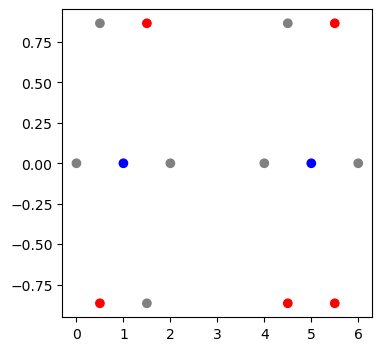

In [5]:
# Case one
# o negative charge; P positive charge; N: neutral; charge = +- 1e; distance = 1
#
#        o   o  N   N  o   o
#      o   P   o  N  o   P   o
#        o   o  N   N  o   o

# use most left as (0,0)

atoms_array = np.concatenate((atoms_array_base, (atoms_array_base+np.array([[0,4,0,0]]))))
E_list, E_lowest, array_lowest_E = MC_run(atoms_array, 100000, Verbose=False)
plt.hist(E_list, bins=30)
plt.show()
print('The lowest energy is %f' %E_lowest)
plot_MC_step(array_lowest_E)
plt.show()

start MC simulation
Total steps : 100000
---------------------
The last config


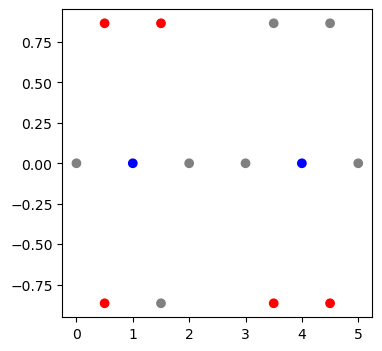

The energy is -1.899973
Finish run!


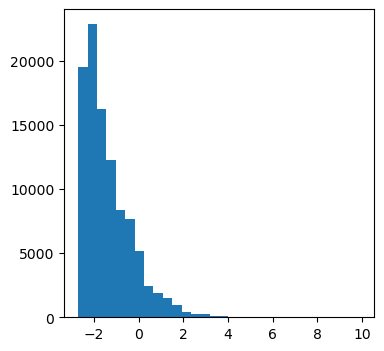

The lowest energy is -2.703249


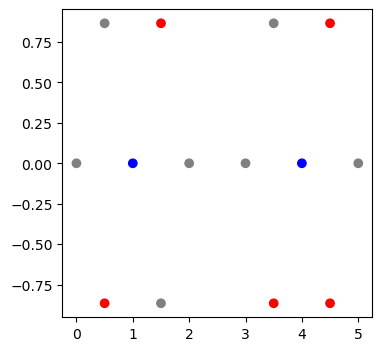

In [6]:
# Case two
# o negative charge; P positive charge; N: neutral; charge = +- 1e; distance = 1 

#        o   o  N   o   o
#      o   P   o  o   P   o
#        o   o  N   o   o

# use most left as (0,0)

atoms_array = np.concatenate((atoms_array_base, (atoms_array_base+np.array([[0,3,0,0]]))))
E_list, E_lowest, array_lowest_E = MC_run(atoms_array, 100000, Verbose=False)
plt.hist(E_list, bins=30)
plt.show()
print('The lowest energy is %f' %E_lowest)
plot_MC_step(array_lowest_E)
plt.show()

start MC simulation
Total steps : 100000
---------------------
The last config


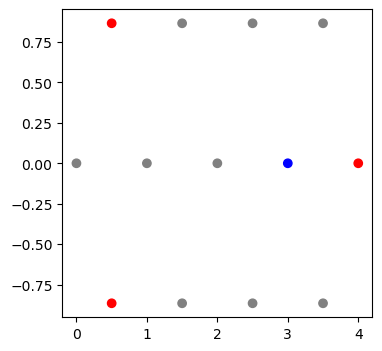

The energy is -0.623878
Finish run!


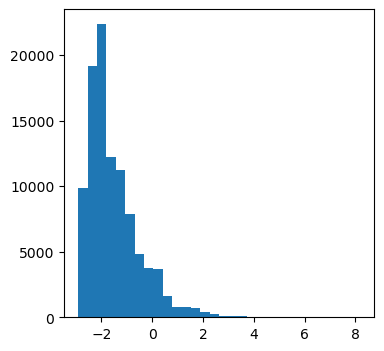

The lowest energy is -2.916667


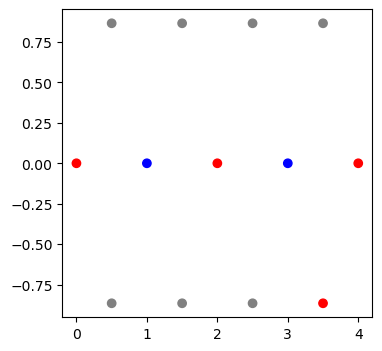

In [7]:
# Case Three
# o negative charge; P positive charge; N: neutral; charge = +- 1e; distance = 1 

#        o   o  o   o
#      o   P  o   P   o
#        o   o  o   o

atoms_array = np.concatenate((atoms_array_base, (atoms_array_base+np.array([[0,2,0,0]]))))
atoms_array = np.delete(atoms_array,(9), axis=0)
E_list, E_lowest, array_lowest_E = MC_run(atoms_array, 100000, Verbose=False)
plt.hist(E_list, bins=30)
plt.show()
print('The lowest energy is %f' %E_lowest)
plot_MC_step(array_lowest_E)
plt.show()

In [ ]:
# Case Four
# o negative charge; P positive charge; N: neutral; charge = +- 1e; distance = 1 

#        o   o   o
#      o   P   P   o  
#        o   o   o

atoms_array = np.zeros((10,4)) # 19 atoms, x, y, q\n",
for i in range(3):
    atoms_array[i] = [2, 0.5 + i, np.sqrt(3)/2, -1]

for i in range(3, 7):
    atoms_array[i] = [2, i-3, 0, -1]

for i in range(7,10):
    atoms_array[i] = [2, 0.5 + i - 7, -np.sqrt(3)/2, -1]

atoms_array[4,3] = 1
atoms_array[5,3] = 1
atoms_array[4,0] = 1
atoms_array[5,0] = 1

E_list, E_lowest, array_lowest_E = MC_run(atoms_array, 1000000, Verbose=False)
plt.hist(E_list, bins=30)
plt.show()
print('The lowest energy is %f' %E_lowest)
plot_MC_step(array_lowest_E)
plt.show()

start MC simulation
Total steps : 1000000
---------------------
